# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
pip install citipy

Note: you may need to restart the kernel to use updated packages.


In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import requests
import time
from pprint import pprint
import scipy.stats as sts
from scipy.stats import linregress
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

612

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
cities_sub = cities[1:10]
cities_sub

['upernavik',
 'barentsburg',
 'knysna',
 'tsiroanomandidy',
 'hilo',
 'atuona',
 'tumannyy',
 'thio',
 'torbay']

In [5]:
#init lists to hold parsed data
lats = []
longs = []
temps = []
feel_likes = []
humids = []
pressures = []
speeds = []
cities_found = []
cloudiness = []

for i in range (len(cities)):
    city = cities[i]
    
    #create the url
    units = "imperial"
    url = f"http://api.openweathermap.org/data/2.5/weather?q={city}&units={units}&appid={weather_api_key}"
    print(url)

    #make the request
    response = requests.get(url)
    # print(response.status_code)
    
    #error check
    if response.status_code == 200:
        data = response.json()
        #pprint(data)
        try:    
            #extract the data
            lat = data["coord"]["lat"]
            long = data["coord"]["lon"]
            temp = data["main"]["temp"]
            feels_like = data["main"]["feels_like"]
            humidity = data["main"]["humidity"]
            pressure = data["main"]["pressure"]
            speed = data["wind"]["speed"]
            city_name = data["name"]
            clouds = data["clouds"]["all"]

            #save the data
            lats.append(lat)
            longs.append(long)
            temps.append(temp)
            feel_likes.append(feels_like)
            humids.append(humidity)
            pressures.append(pressure)
            speeds.append(speed)
            cloudiness.append(clouds)
            cities_found.append(city_name)
        except Exception as e:
            print(f"Through exception for city {city}: {e}")

    elif response.status_code == 404:
        print(f"Missing data in OpenWeatherAPI for {city}")
    else:
        print(response.status_code)
        print("Oh gosh darnit. The API is broken. Sad Face.")
        
    if (i % 5 == 0):
        print(f"Got data for city index: {i} of {len(cities)}")
    
        
    time.sleep(2)
        
# make the dataframe
df = pd.DataFrame()
df["Longitude"] = longs
df["Latitude"] = lats
df["City"] = cities_found
df["Temperature"] = temps
df["Feels Like"] = feel_likes
df["Humidity"] = humids
df["Pressure"] = pressures
df["Wind Speed"] = speeds
df["Cloudiness"] = cloudiness

df.head(10)


http://api.openweathermap.org/data/2.5/weather?q=hermanus&units=imperial&appid=0647cca2482a23061e848734de3bd290
Got data for city index: 0 of 612
http://api.openweathermap.org/data/2.5/weather?q=upernavik&units=imperial&appid=0647cca2482a23061e848734de3bd290
http://api.openweathermap.org/data/2.5/weather?q=barentsburg&units=imperial&appid=0647cca2482a23061e848734de3bd290
Missing data in OpenWeatherAPI for barentsburg
http://api.openweathermap.org/data/2.5/weather?q=knysna&units=imperial&appid=0647cca2482a23061e848734de3bd290
http://api.openweathermap.org/data/2.5/weather?q=tsiroanomandidy&units=imperial&appid=0647cca2482a23061e848734de3bd290
http://api.openweathermap.org/data/2.5/weather?q=hilo&units=imperial&appid=0647cca2482a23061e848734de3bd290
Got data for city index: 5 of 612
http://api.openweathermap.org/data/2.5/weather?q=atuona&units=imperial&appid=0647cca2482a23061e848734de3bd290
http://api.openweathermap.org/data/2.5/weather?q=tumannyy&units=imperial&appid=0647cca2482a23061e8

http://api.openweathermap.org/data/2.5/weather?q=lasa&units=imperial&appid=0647cca2482a23061e848734de3bd290
http://api.openweathermap.org/data/2.5/weather?q=acari&units=imperial&appid=0647cca2482a23061e848734de3bd290
http://api.openweathermap.org/data/2.5/weather?q=dhidhdhoo&units=imperial&appid=0647cca2482a23061e848734de3bd290
http://api.openweathermap.org/data/2.5/weather?q=kapaa&units=imperial&appid=0647cca2482a23061e848734de3bd290
Got data for city index: 70 of 612
http://api.openweathermap.org/data/2.5/weather?q=phalaborwa&units=imperial&appid=0647cca2482a23061e848734de3bd290
http://api.openweathermap.org/data/2.5/weather?q=chegdomyn&units=imperial&appid=0647cca2482a23061e848734de3bd290
http://api.openweathermap.org/data/2.5/weather?q=bethel&units=imperial&appid=0647cca2482a23061e848734de3bd290
http://api.openweathermap.org/data/2.5/weather?q=voznesenye&units=imperial&appid=0647cca2482a23061e848734de3bd290
http://api.openweathermap.org/data/2.5/weather?q=lakatoro&units=imperial&ap

http://api.openweathermap.org/data/2.5/weather?q=kruisfontein&units=imperial&appid=0647cca2482a23061e848734de3bd290
http://api.openweathermap.org/data/2.5/weather?q=norman wells&units=imperial&appid=0647cca2482a23061e848734de3bd290
http://api.openweathermap.org/data/2.5/weather?q=hami&units=imperial&appid=0647cca2482a23061e848734de3bd290
Got data for city index: 135 of 612
http://api.openweathermap.org/data/2.5/weather?q=sobolevo&units=imperial&appid=0647cca2482a23061e848734de3bd290
http://api.openweathermap.org/data/2.5/weather?q=suntar&units=imperial&appid=0647cca2482a23061e848734de3bd290
http://api.openweathermap.org/data/2.5/weather?q=progreso&units=imperial&appid=0647cca2482a23061e848734de3bd290
http://api.openweathermap.org/data/2.5/weather?q=robertsport&units=imperial&appid=0647cca2482a23061e848734de3bd290
http://api.openweathermap.org/data/2.5/weather?q=cockburn town&units=imperial&appid=0647cca2482a23061e848734de3bd290
Got data for city index: 140 of 612
http://api.openweather

http://api.openweathermap.org/data/2.5/weather?q=henties bay&units=imperial&appid=0647cca2482a23061e848734de3bd290
Got data for city index: 200 of 612
http://api.openweathermap.org/data/2.5/weather?q=itacare&units=imperial&appid=0647cca2482a23061e848734de3bd290
http://api.openweathermap.org/data/2.5/weather?q=igarka&units=imperial&appid=0647cca2482a23061e848734de3bd290
http://api.openweathermap.org/data/2.5/weather?q=lata&units=imperial&appid=0647cca2482a23061e848734de3bd290
http://api.openweathermap.org/data/2.5/weather?q=bassar&units=imperial&appid=0647cca2482a23061e848734de3bd290
http://api.openweathermap.org/data/2.5/weather?q=quang ngai&units=imperial&appid=0647cca2482a23061e848734de3bd290
Got data for city index: 205 of 612
http://api.openweathermap.org/data/2.5/weather?q=agadez&units=imperial&appid=0647cca2482a23061e848734de3bd290
http://api.openweathermap.org/data/2.5/weather?q=sandpoint&units=imperial&appid=0647cca2482a23061e848734de3bd290
http://api.openweathermap.org/data/2.

http://api.openweathermap.org/data/2.5/weather?q=seymchan&units=imperial&appid=0647cca2482a23061e848734de3bd290
http://api.openweathermap.org/data/2.5/weather?q=kirakira&units=imperial&appid=0647cca2482a23061e848734de3bd290
http://api.openweathermap.org/data/2.5/weather?q=gobabis&units=imperial&appid=0647cca2482a23061e848734de3bd290
http://api.openweathermap.org/data/2.5/weather?q=kamenskoye&units=imperial&appid=0647cca2482a23061e848734de3bd290
Missing data in OpenWeatherAPI for kamenskoye
Got data for city index: 270 of 612
http://api.openweathermap.org/data/2.5/weather?q=flin flon&units=imperial&appid=0647cca2482a23061e848734de3bd290
http://api.openweathermap.org/data/2.5/weather?q=klaksvik&units=imperial&appid=0647cca2482a23061e848734de3bd290
http://api.openweathermap.org/data/2.5/weather?q=ust-barguzin&units=imperial&appid=0647cca2482a23061e848734de3bd290
http://api.openweathermap.org/data/2.5/weather?q=mazamari&units=imperial&appid=0647cca2482a23061e848734de3bd290
http://api.openw

http://api.openweathermap.org/data/2.5/weather?q=los llanos de aridane&units=imperial&appid=0647cca2482a23061e848734de3bd290
Got data for city index: 335 of 612
http://api.openweathermap.org/data/2.5/weather?q=vagur&units=imperial&appid=0647cca2482a23061e848734de3bd290
http://api.openweathermap.org/data/2.5/weather?q=santa rosa&units=imperial&appid=0647cca2482a23061e848734de3bd290
http://api.openweathermap.org/data/2.5/weather?q=polyarnyy&units=imperial&appid=0647cca2482a23061e848734de3bd290
http://api.openweathermap.org/data/2.5/weather?q=alofi&units=imperial&appid=0647cca2482a23061e848734de3bd290
http://api.openweathermap.org/data/2.5/weather?q=burnie&units=imperial&appid=0647cca2482a23061e848734de3bd290
Got data for city index: 340 of 612
http://api.openweathermap.org/data/2.5/weather?q=antalya&units=imperial&appid=0647cca2482a23061e848734de3bd290
http://api.openweathermap.org/data/2.5/weather?q=zeya&units=imperial&appid=0647cca2482a23061e848734de3bd290
http://api.openweathermap.org

Missing data in OpenWeatherAPI for kerki
http://api.openweathermap.org/data/2.5/weather?q=coihaique&units=imperial&appid=0647cca2482a23061e848734de3bd290
http://api.openweathermap.org/data/2.5/weather?q=acarau&units=imperial&appid=0647cca2482a23061e848734de3bd290
http://api.openweathermap.org/data/2.5/weather?q=zerbst&units=imperial&appid=0647cca2482a23061e848734de3bd290
http://api.openweathermap.org/data/2.5/weather?q=flateby&units=imperial&appid=0647cca2482a23061e848734de3bd290
Got data for city index: 405 of 612
http://api.openweathermap.org/data/2.5/weather?q=myre&units=imperial&appid=0647cca2482a23061e848734de3bd290
http://api.openweathermap.org/data/2.5/weather?q=entre rios&units=imperial&appid=0647cca2482a23061e848734de3bd290
http://api.openweathermap.org/data/2.5/weather?q=kazalinsk&units=imperial&appid=0647cca2482a23061e848734de3bd290
Missing data in OpenWeatherAPI for kazalinsk
http://api.openweathermap.org/data/2.5/weather?q=santiago&units=imperial&appid=0647cca2482a23061e84

http://api.openweathermap.org/data/2.5/weather?q=geraldton&units=imperial&appid=0647cca2482a23061e848734de3bd290
http://api.openweathermap.org/data/2.5/weather?q=biggar&units=imperial&appid=0647cca2482a23061e848734de3bd290
Got data for city index: 470 of 612
http://api.openweathermap.org/data/2.5/weather?q=santa fe&units=imperial&appid=0647cca2482a23061e848734de3bd290
http://api.openweathermap.org/data/2.5/weather?q=bogalusa&units=imperial&appid=0647cca2482a23061e848734de3bd290
http://api.openweathermap.org/data/2.5/weather?q=sabang&units=imperial&appid=0647cca2482a23061e848734de3bd290
http://api.openweathermap.org/data/2.5/weather?q=hofn&units=imperial&appid=0647cca2482a23061e848734de3bd290
http://api.openweathermap.org/data/2.5/weather?q=westport&units=imperial&appid=0647cca2482a23061e848734de3bd290
Got data for city index: 475 of 612
http://api.openweathermap.org/data/2.5/weather?q=port blair&units=imperial&appid=0647cca2482a23061e848734de3bd290
http://api.openweathermap.org/data/2.

http://api.openweathermap.org/data/2.5/weather?q=hovd&units=imperial&appid=0647cca2482a23061e848734de3bd290
http://api.openweathermap.org/data/2.5/weather?q=nancha&units=imperial&appid=0647cca2482a23061e848734de3bd290
http://api.openweathermap.org/data/2.5/weather?q=brae&units=imperial&appid=0647cca2482a23061e848734de3bd290
http://api.openweathermap.org/data/2.5/weather?q=tabory&units=imperial&appid=0647cca2482a23061e848734de3bd290
http://api.openweathermap.org/data/2.5/weather?q=krasnoselkup&units=imperial&appid=0647cca2482a23061e848734de3bd290
Got data for city index: 540 of 612
http://api.openweathermap.org/data/2.5/weather?q=virden&units=imperial&appid=0647cca2482a23061e848734de3bd290
http://api.openweathermap.org/data/2.5/weather?q=hihifo&units=imperial&appid=0647cca2482a23061e848734de3bd290
Missing data in OpenWeatherAPI for hihifo
http://api.openweathermap.org/data/2.5/weather?q=bonavista&units=imperial&appid=0647cca2482a23061e848734de3bd290
http://api.openweathermap.org/data/2.

http://api.openweathermap.org/data/2.5/weather?q=kadnikov&units=imperial&appid=0647cca2482a23061e848734de3bd290
http://api.openweathermap.org/data/2.5/weather?q=port hedland&units=imperial&appid=0647cca2482a23061e848734de3bd290
Got data for city index: 605 of 612
http://api.openweathermap.org/data/2.5/weather?q=bontang&units=imperial&appid=0647cca2482a23061e848734de3bd290
http://api.openweathermap.org/data/2.5/weather?q=mangai&units=imperial&appid=0647cca2482a23061e848734de3bd290
http://api.openweathermap.org/data/2.5/weather?q=katsuura&units=imperial&appid=0647cca2482a23061e848734de3bd290
http://api.openweathermap.org/data/2.5/weather?q=mawlaik&units=imperial&appid=0647cca2482a23061e848734de3bd290
http://api.openweathermap.org/data/2.5/weather?q=potlogi&units=imperial&appid=0647cca2482a23061e848734de3bd290
Got data for city index: 610 of 612
http://api.openweathermap.org/data/2.5/weather?q=hualmay&units=imperial&appid=0647cca2482a23061e848734de3bd290


,Longitude,Latitude,City,Temperature,Feels Like,Humidity,Pressure,Wind Speed,Cloudiness
0,19.23,-34.42,Hermanus,53.01,50.38,70,1026,1.99,1
1,-56.15,72.79,Upernavik,-5.73,-19.05,79,1004,11.81,0
2,23.05,-34.04,Knysna,53.60,47.34,81,1025,10.29,75
3,46.03,-18.77,Tsiroanomandidy,75.18,69.87,40,1019,9.19,95
4,-155.09,19.73,Hilo,71.94,76.05,88,1016,4.70,90
5,-139.03,-9.80,Atuona,77.61,76.12,66,1013,12.30,51
6,166.22,-21.62,Thio,78.80,69.21,50,1013,21.92,52
7,-52.73,47.67,Torbay,31.98,22.30,74,1024,9.17,20
8,-73.97,42.60,Albany,45.54,43.34,100,1028,2.06,1
9,-70.92,-53.15,Punta Arenas,41.00,30.13,80,1014,13.87,0


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
df.to_csv('new_file.csv', index = False)

df = pd.read_csv('new_file.csv')

In [8]:
df.describe()

,Longitude,Latitude,Temperature,Feels Like,Humidity,Pressure,Wind Speed,Cloudiness
count,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000
mean,20.046135,20.067943,56.923440,53.117447,73.929078,1014.219858,8.473617,51.099291
std,89.067099,33.862514,23.183693,28.161146,20.574915,9.145434,6.378307,39.655856
min,-179.170000,-54.800000,-14.890000,-23.300000,7.000000,973.000000,0.360000,0.000000
25%,-55.402500,-8.082500,40.815000,31.845000,64.000000,1011.000000,3.505000,3.750000
50%,25.365000,22.905000,60.800000,56.840000,78.000000,1015.000000,6.930000,58.000000
75%,99.922500,50.685000,76.000000,76.597500,90.000000,1020.000000,11.410000,90.000000
max,179.320000,78.220000,104.000000,104.000000,100.000000,1039.000000,42.260000,100.000000


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [9]:
df.describe()

,Longitude,Latitude,Temperature,Feels Like,Humidity,Pressure,Wind Speed,Cloudiness
count,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000
mean,20.046135,20.067943,56.923440,53.117447,73.929078,1014.219858,8.473617,51.099291
std,89.067099,33.862514,23.183693,28.161146,20.574915,9.145434,6.378307,39.655856
min,-179.170000,-54.800000,-14.890000,-23.300000,7.000000,973.000000,0.360000,0.000000
25%,-55.402500,-8.082500,40.815000,31.845000,64.000000,1011.000000,3.505000,3.750000
50%,25.365000,22.905000,60.800000,56.840000,78.000000,1015.000000,6.930000,58.000000
75%,99.922500,50.685000,76.000000,76.597500,90.000000,1020.000000,11.410000,90.000000
max,179.320000,78.220000,104.000000,104.000000,100.000000,1039.000000,42.260000,100.000000


In [10]:
#  Get the indices of cities that have humidity over 100%.


In [11]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

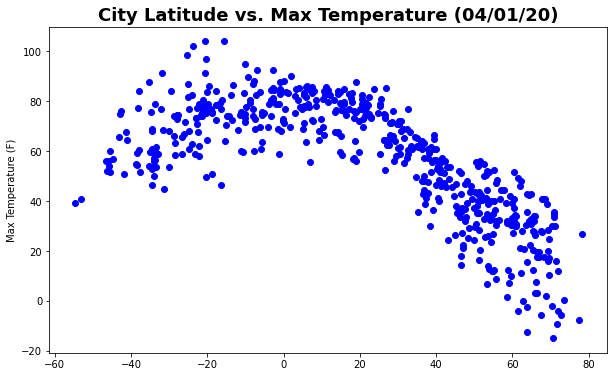

In [12]:
plt.figure(figsize = (10,6))

plt.scatter(df["Latitude"], df["Temperature"], color = "blue")
plt.title("City Latitude vs. Max Temperature (04/01/20)", fontsize = 18, fontweight = "bold")
plt.ylabel("Max Temperature (F)")

plt.show()

## Latitude vs. Humidity Plot

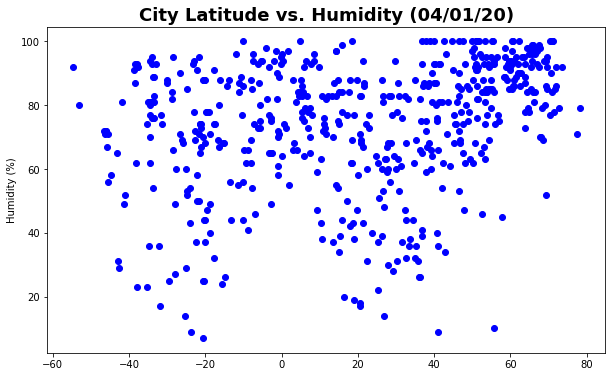

In [13]:
plt.figure(figsize = (10,6))

plt.scatter(df["Latitude"], df["Humidity"], color = "blue")
plt.title("City Latitude vs. Humidity (04/01/20)", fontsize = 18, fontweight = "bold")
plt.ylabel("Humidity (%)")

plt.show()

plt.savefig('latitude_vs_humidity.png')

## Latitude vs. Cloudiness Plot

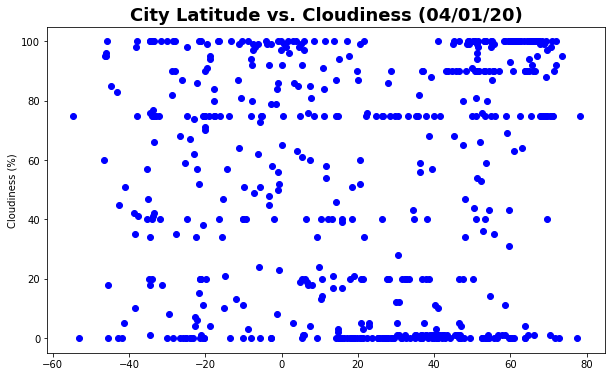

<Figure size 432x288 with 0 Axes>

In [46]:
plt.figure(figsize = (10,6))

plt.scatter(df["Latitude"], df["Cloudiness"], color = "blue")
plt.title("City Latitude vs. Cloudiness (04/01/20)", fontsize = 18, fontweight = "bold")
plt.ylabel("Cloudiness (%)")

plt.show()

plt.savefig('latitude_vs_cloudiness.png')

## Latitude vs. Wind Speed Plot

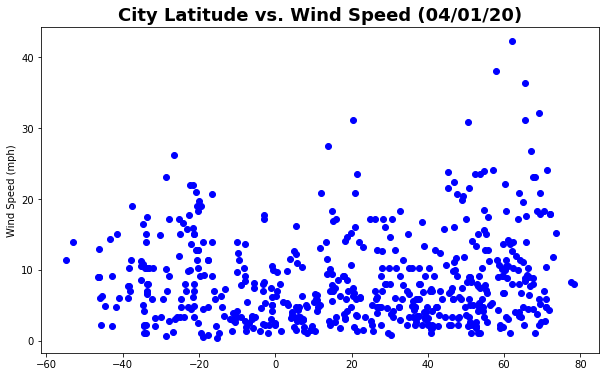

<Figure size 432x288 with 0 Axes>

In [47]:
plt.figure(figsize = (10,6))

plt.scatter(df["Latitude"], df["Wind Speed"], color = "blue")
plt.title("City Latitude vs. Wind Speed (04/01/20)", fontsize = 18, fontweight = "bold")
plt.ylabel("Wind Speed (mph)")

plt.show()

plt.savefig('latitude_vs_windspeed.png')

## Linear Regression

In [16]:
north_df = df[df['Latitude'] > 0]

In [17]:
sts.pearsonr(north_df["Latitude"], north_df["Temperature"])

(-0.8762433159825163, 1.6938110794963524e-123)

In [18]:
feature = north_df["Latitude"]
target = north_df["Temperature"]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

y = 0.08x + 5.61
The r-squared is: 0.05329897451164845


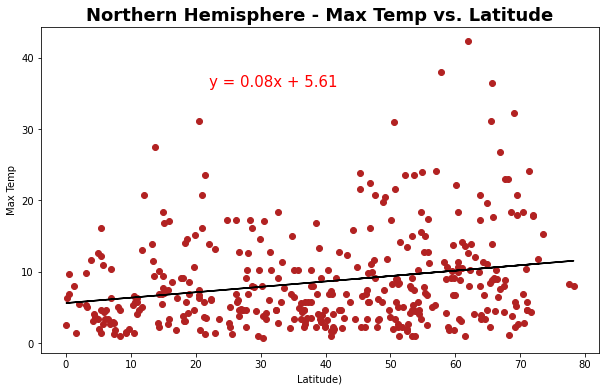

<Figure size 432x288 with 0 Axes>

In [50]:
(slope, intercept, rvalue, pvalue, stderr) = sts.linregress(feature, target)
regress_values = feature * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
print(f"The r-squared is: {rvalue**2}")

plt.figure(figsize=(10,6))

plt.scatter(feature, target, color = "firebrick")
plt.title("Northern Hemisphere - Max Temp vs. Latitude", fontsize=18, fontweight="bold", fontname = "Lucida Calligraphy")
plt.xlabel("Latitude)")
plt.ylabel("Max Temp")
plt.plot(feature, regress_values, color="black")
plt.annotate(line_eq,(22,36),fontsize=15,color="red")

plt.show()

plt.savefig('north_temp_vs_lat.png')


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

In [20]:
south_df = df[df['Latitude'] < 0]

sts.pearsonr(south_df["Latitude"], south_df["Temperature"])

(0.5266776680403293, 3.653608099342398e-14)

In [21]:
feature = south_df["Latitude"]
target = south_df["Temperature"]

y = 0.08x + 5.61
The r-squared is: 0.05329897451164845


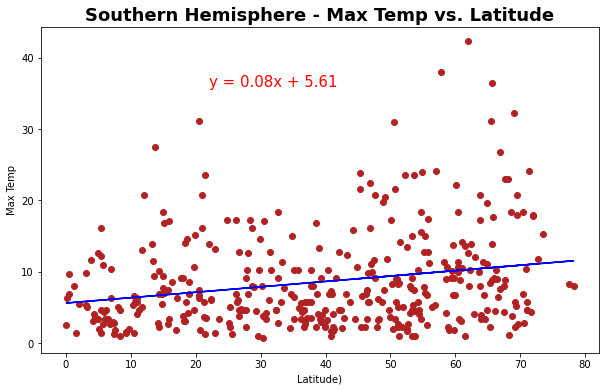

<Figure size 432x288 with 0 Axes>

In [49]:
(slope, intercept, rvalue, pvalue, stderr) = sts.linregress(feature, target)
regress_values = feature * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
print(f"The r-squared is: {rvalue**2}")

plt.figure(figsize=(10,6))

plt.scatter(feature, target, color = "firebrick")
plt.title("Southern Hemisphere - Max Temp vs. Latitude", fontsize=18, fontweight="bold", fontname = "Lucida Calligraphy")
plt.xlabel("Latitude)")
plt.ylabel("Max Temp")
plt.plot(feature, regress_values, color="blue")
plt.annotate(line_eq,(22,36),fontsize=15,color="red")

plt.show()

plt.savefig('south_temp_vs_lat.png')

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [23]:
north_df = df[df['Latitude'] > 0]

In [24]:
sts.pearsonr(north_df["Latitude"], north_df["Humidity"])

(0.34666310275056816, 2.5948439831538107e-12)

In [25]:
feature = north_df["Latitude"]
target = north_df["Humidity"]

y = 0.08x + 5.61
The r-squared is: 0.05329897451164845


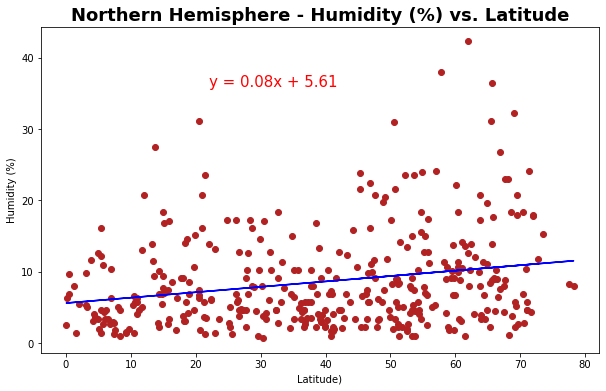

<Figure size 432x288 with 0 Axes>

In [51]:
(slope, intercept, rvalue, pvalue, stderr) = sts.linregress(feature, target)
regress_values = feature * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
print(f"The r-squared is: {rvalue**2}")

plt.figure(figsize=(10,6))

plt.scatter(feature, target, color = "firebrick")
plt.title("Northern Hemisphere - Humidity (%) vs. Latitude", fontsize=18, fontweight="bold", fontname = "Lucida Calligraphy")
plt.xlabel("Latitude)")
plt.ylabel("Humidity (%)")
plt.plot(feature, regress_values, color="blue")
plt.annotate(line_eq,(22,36),fontsize=15,color="red")

plt.show()

plt.savefig('north_hum_vs_lat.png')

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [27]:
south_df = df[df['Latitude'] < 0]

sts.pearsonr(south_df["Latitude"], south_df["Humidity"])

(0.12061834638225823, 0.10776174076170221)

In [28]:
feature = south_df["Latitude"]
target = south_df["Humidity"]

y = 0.08x + 5.61
The r-squared is: 0.05329897451164845


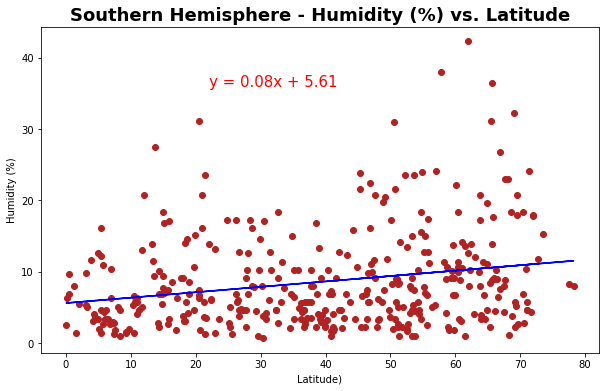

<Figure size 432x288 with 0 Axes>

In [53]:
(slope, intercept, rvalue, pvalue, stderr) = sts.linregress(feature, target)
regress_values = feature * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
print(f"The r-squared is: {rvalue**2}")

plt.figure(figsize=(10,6))

plt.scatter(feature, target, color = "firebrick")
plt.title("Southern Hemisphere - Humidity (%) vs. Latitude", fontsize=18, fontweight="bold", fontname = "Lucida Calligraphy")
plt.xlabel("Latitude)")
plt.ylabel("Humidity (%)")
plt.plot(feature, regress_values, color="blue")
plt.annotate(line_eq,(22,36),fontsize=15,color="red")

plt.show()

plt.savefig('south_hum_vs_lat.png')

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [30]:
north_df = df[df['Latitude'] > 0]

In [31]:
sts.pearsonr(north_df["Latitude"], north_df["Cloudiness"])

(0.26311118838358066, 1.619661262454753e-07)

In [32]:
feature = north_df["Latitude"]
target = north_df["Cloudiness"]

y = 0.53x + 28.34
The r-squared is: 0.06922749745262011


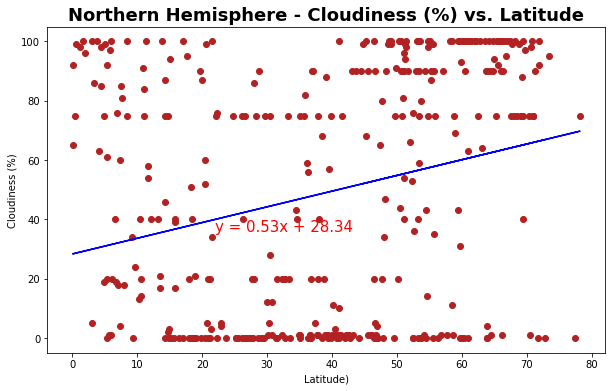

In [33]:
(slope, intercept, rvalue, pvalue, stderr) = sts.linregress(feature, target)
regress_values = feature * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
print(f"The r-squared is: {rvalue**2}")

plt.figure(figsize=(10,6))

plt.scatter(feature, target, color = "firebrick")
plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude", fontsize=18, fontweight="bold", fontname = "Lucida Calligraphy")
plt.xlabel("Latitude)")
plt.ylabel("Cloudiness (%)")
plt.plot(feature, regress_values, color="blue")
plt.annotate(line_eq,(22,36),fontsize=15,color="red")

plt.show()

plt.savefig('north_cloud_vs_lat')

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [34]:
south_df = df[df['Latitude'] < 0]

sts.pearsonr(south_df["Latitude"], south_df["Cloudiness"])

(0.08046224326837707, 0.2843013257302335)

In [35]:
feature = south_df["Latitude"]
target = south_df["Cloudiness"]

y = 0.22x + 59.9
The r-squared is: 0.006474172591779498


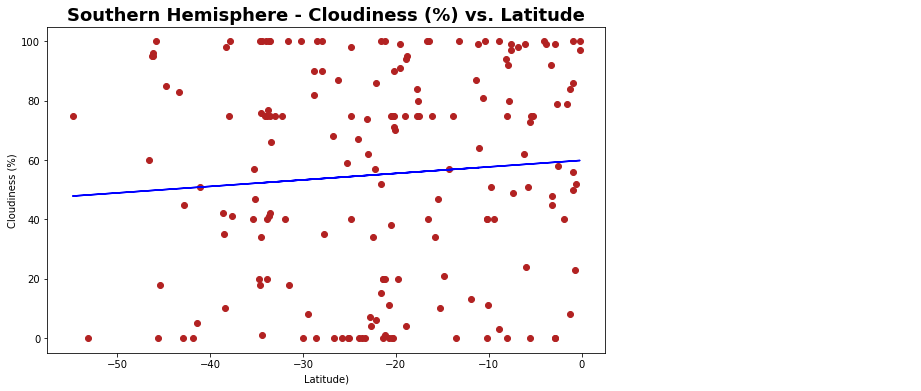

In [36]:
(slope, intercept, rvalue, pvalue, stderr) = sts.linregress(feature, target)
regress_values = feature * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
print(f"The r-squared is: {rvalue**2}")

plt.figure(figsize=(10,6))

plt.scatter(feature, target, color = "firebrick")
plt.title("Southern Hemisphere - Cloudiness (%) vs. Latitude", fontsize=18, fontweight="bold", fontname = "Lucida Calligraphy")
plt.xlabel("Latitude)")
plt.ylabel("Cloudiness (%)")
plt.plot(feature, regress_values, color="blue")
plt.annotate(line_eq,(22,36),fontsize=15,color="red")

plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [37]:
north_df = df[df['Latitude'] > 0]

In [38]:
sts.pearsonr(south_df["Latitude"], south_df["Wind Speed"])

(-0.19709461581733556, 0.00818204932264889)

In [39]:
feature = south_df["Latitude"]
target = south_df["Wind Speed"]

y = -0.08x + 6.41
The r-squared is: 0.038846287584183056


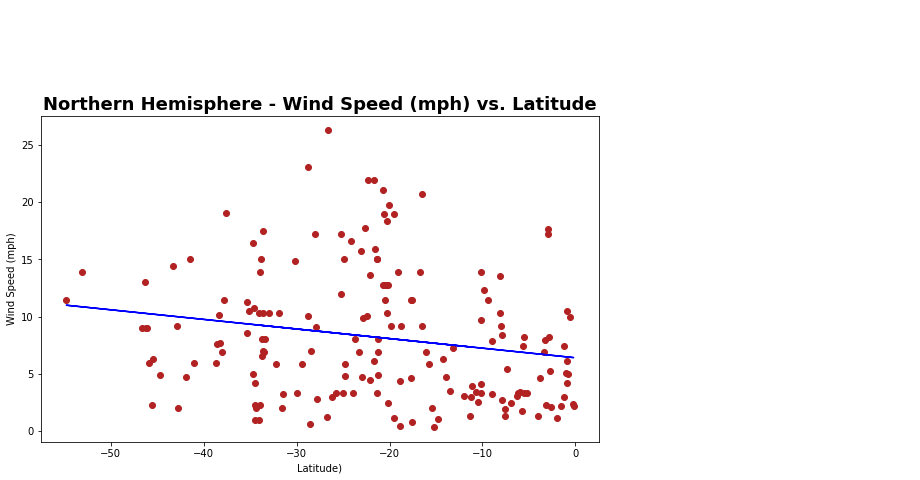

In [40]:
(slope, intercept, rvalue, pvalue, stderr) = sts.linregress(feature, target)
regress_values = feature * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
print(f"The r-squared is: {rvalue**2}")

plt.figure(figsize=(10,6))

plt.scatter(feature, target, color = "firebrick")
plt.title("Northern Hemisphere - Wind Speed (mph) vs. Latitude", fontsize=18, fontweight="bold", fontname = "Lucida Calligraphy")
plt.xlabel("Latitude)")
plt.ylabel("Wind Speed (mph)")
plt.plot(feature, regress_values, color="blue")
plt.annotate(line_eq,(22,36),fontsize=15,color="red")

plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [41]:
south_df = df[df['Latitude'] < 0]

sts.pearsonr(south_df["Latitude"], south_df["Wind Speed"])

(-0.19709461581733556, 0.00818204932264889)

In [42]:
feature = north_df["Latitude"]
target = north_df["Wind Speed"]

y = 0.08x + 5.61
The r-squared is: 0.05329897451164845


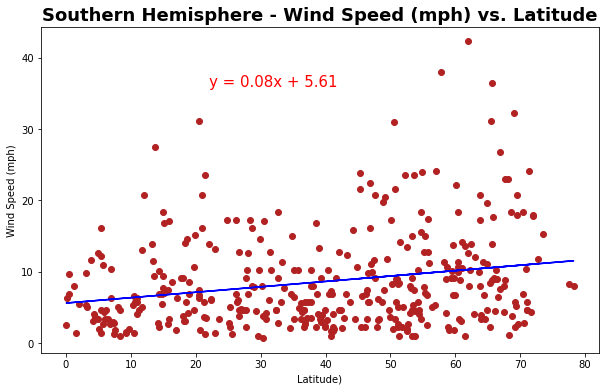

In [43]:
(slope, intercept, rvalue, pvalue, stderr) = sts.linregress(feature, target)
regress_values = feature * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
print(f"The r-squared is: {rvalue**2}")

plt.figure(figsize=(10,6))

plt.scatter(feature, target, color = "firebrick")
plt.title("Southern Hemisphere - Wind Speed (mph) vs. Latitude", fontsize=18, fontweight="bold", fontname = "Lucida Calligraphy")
plt.xlabel("Latitude)")
plt.ylabel("Wind Speed (mph)")
plt.plot(feature, regress_values, color="blue")
plt.annotate(line_eq,(22,36),fontsize=15,color="red")

plt.show()